In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

In [ ]:
from google.colab import files
data=files.upload()

Saving Dataset of Diabetes 1.csv to Dataset of Diabetes 1 (1).csv


In [ ]:
df=pd.read_csv("/content/Dataset of Diabetes 1 (1).csv")

In [ ]:
df

,ID,Gender,AGE,HbA1c,HDL,LDL,BMI,CLASS
0,502,F,50,4.9,2.4,1.4,24.0,N
1,735,M,26,4.9,1.1,2.1,23.0,N
2,420,F,50,4.9,2.4,1.4,24.0,N
3,680,F,50,4.9,2.4,1.4,24.0,N
4,504,M,33,4.9,0.8,2.0,21.0,N
...,...,...,...,...,...,...,...,...
494,397,M,55,11.7,1.3,2.3,30.0,Y
495,681,F,58,9.0,3.2,1.4,35.0,Y
496,749,M,55,10.0,1.2,3.4,33.0,Y
497,321,F,54,10.7,1.1,4.2,39.0,Y


In [ ]:
arr=np.array(df)
arr

array([[502, 'F', 50, ..., 1.4, 24.0, 'N'],
       [735, 'M', 26, ..., 2.1, 23.0, 'N'],
       [420, 'F', 50, ..., 1.4, 24.0, 'N'],
       ...,
       [749, 'M', 55, ..., 3.4, 33.0, 'Y'],
       [321, 'F', 54, ..., 4.2, 39.0, 'Y'],
       [381, 'M', 58, ..., 2.0, 29.0, 'Y']], dtype=object)

In [ ]:
df.isnull().sum()

ID        0
Gender    0
AGE       0
HbA1c     0
HDL       0
LDL       0
BMI       0
CLASS     0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.shape

(499, 8)

In [ ]:
df.replace({'Gender':{'M':0,'F':1}},inplace=True)

In [ ]:
x=df.drop(columns='ID',axis=1)
df=x

In [ ]:
x=df.drop(columns='CLASS',axis=1)
y=df['CLASS']
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=(0.3))
train_x.shape

(349, 6)

In [ ]:
train_x

,Gender,AGE,HbA1c,HDL,LDL,BMI
313,0,60,9.0,0.80,3.70,30.0
35,1,39,4.0,1.10,2.60,22.0
432,0,52,7.9,1.10,2.50,28.0
116,0,50,6.2,0.60,1.00,24.0
362,1,60,6.2,1.00,4.40,27.0
...,...,...,...,...,...,...
268,1,55,5.9,1.00,2.00,30.0
117,1,49,6.0,0.75,1.35,23.0
90,0,30,5.6,0.90,3.30,24.5
49,1,47,5.0,1.00,2.40,22.0


In [ ]:
test_x.shape

(150, 6)

In [ ]:
test_x

,Gender,AGE,HbA1c,HDL,LDL,BMI
98,0,60,0.9,1.1,3.6,24.0
275,0,56,7.6,0.9,3.3,26.0
66,1,35,5.0,1.3,2.4,20.0
179,0,49,5.2,3.9,0.8,24.0
339,1,61,11.5,1.1,2.5,26.0
...,...,...,...,...,...,...
128,0,50,5.9,1.0,3.7,25.0
195,0,50,4.0,1.1,3.2,23.0
401,0,60,6.8,0.7,4.1,33.0
264,1,55,5.9,1.0,2.0,30.0


In [ ]:
pd.DataFrame(train_x).describe()

,Gender,AGE,HbA1c,HDL,LDL,BMI
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,0.455587,50.977077,7.013181,1.182178,2.641547,28.290688
std,0.498739,9.138748,2.099589,0.587388,1.057292,5.331973
min,0.000000,28.000000,0.900000,0.500000,0.300000,19.000000
25%,0.000000,46.000000,5.400000,0.900000,1.900000,24.000000
50%,0.000000,54.000000,6.800000,1.100000,2.500000,28.000000
75%,1.000000,56.000000,8.300000,1.300000,3.400000,32.900000
max,1.000000,77.000000,13.700000,6.600000,9.900000,43.250000


In [ ]:
train_y.shape

(349,)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_x_sc=sc.fit_transform(train_x)
pd.DataFrame(train_x_sc).describe()

,0,1,2,3,4,5
count,3.490000e+02,3.490000e+02,3.490000e+02,3.490000e+02,3.490000e+02,3.490000e+02
mean,1.030694e-16,2.048664e-16,1.864157e-16,-3.200242e-16,-1.072049e-16,4.549051e-16
std,1.001436e+00,1.001436e+00,1.001436e+00,1.001436e+00,1.001436e+00,1.001436e+00
min,-9.147907e-01,-2.517858e+00,-2.915789e+00,-1.163042e+00,-2.217844e+00,-1.744950e+00
25%,-9.147907e-01,-5.453945e-01,-7.694347e-01,-4.810838e-01,-7.023716e-01,-8.058646e-01
50%,-9.147907e-01,3.312557e-01,-1.016802e-01,-1.401044e-01,-1.340694e-01,-5.459612e-02
75%,1.093146e+00,5.504183e-01,6.137711e-01,2.008749e-01,7.183840e-01,8.657077e-01
max,1.093146e+00,2.851625e+00,3.189396e+00,9.236828e+00,6.874991e+00,2.809615e+00


In [ ]:
from sklearn.linear_model import Perceptron
p=Perceptron()
p.fit(train_x_sc,train_y)
train_pred=p.predict(train_x_sc)
test_pred=p.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Perceptron was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import accuracy_score
print('Training Accuracy =',accuracy_score(train_pred,train_y))

Training Accuracy = 0.7449856733524355


In [ ]:
print('Test Accuracy =',accuracy_score(test_y,test_pred))

Test Accuracy = 0.6866666666666666


In [ ]:
from sklearn.svm import SVC
svc=SVC()

In [ ]:
svc.fit(train_x_sc,train_y)

SVC()

In [ ]:
train_pred_svc=svc.predict(train_x_sc)
test_pred_svc=svc.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
print("Training",accuracy_score(train_pred_svc,train_y))

Training 0.9054441260744985


In [ ]:
print("Test",accuracy_score(test_pred_svc,test_y))

Test 0.6866666666666666


In [ ]:
svc1=SVC(kernel="rbf",C=0.5)
svc1.fit(train_x_sc,train_y)
train_pred_svc1=svc1.predict(train_x_sc)
test_pred_svc1=svc1.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
print("Train",accuracy_score(train_pred_svc1,train_y))

Train 0.8681948424068768


In [ ]:
print("test",accuracy_score(test_pred_svc1,test_y))

test 0.6866666666666666


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x_sc,train_y)
train_pred_knn=knn.predict(train_x_sc)
test_pred_knn=knn.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
print("Train accuracy",accuracy_score(train_pred_knn,train_y))
print("test accuracy",accuracy_score(test_pred_knn,test_y))

Train accuracy 0.9226361031518625
test accuracy 0.6866666666666666


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_x_sc,train_y)
train_pred_dt=dt.predict(train_x_sc)
test_pred_dt=dt.predict(test_x)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
print("Training",accuracy_score(train_pred_dt,train_y))
print("testing",accuracy_score(test_pred_dt,test_y))

Training 1.0
testing 0.6866666666666666


In [ ]:
dt1=DecisionTreeClassifier(criterion='entropy')
dt1.fit(train_x_sc,train_y)
train_pred_dt1=dt1.predict(train_x_sc)
test_pred_dt1=dt1.predict(test_x)


In [ ]:
print("Training value",accuracy_score(train_pred_dt1,train_y))
print("testing value",accuracy_score(test_pred_dt1,test_y))

Training value 1.0
testing value 0.6866666666666666


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_x_sc,train_y)
train_pred_rf=rf.predict(train_x_sc)
test_pred_rf=rf.predict(test_x)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
print("Training",accuracy_score(train_pred_rf,train_y))
print("Testing",accuracy_score(test_pred_rf,test_y))

Training 1.0
Testing 0.6866666666666666


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
p=Perceptron()
svm=SVC()
knn=KNeighborsClassifier()

In [ ]:
vc=VotingClassifier(estimators=[('perceptron',p),('svm',svm),('knn',knn)],voting='hard', weights=[3,1,1])
vc.fit(train_x_sc,train_y)
train_pred_vc=vc.predict(train_x_sc)
test_pred_vc=vc.predict(test_x)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Perceptron was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
print("Training",accuracy_score(train_pred_vc,train_y))
print("Testing",accuracy_score(test_pred_vc,test_y))

Training 0.7449856733524355
Testing 0.6866666666666666


In [ ]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator=knn,n_estimators=20)
bag.fit(train_x_sc,train_y)
train_pred_bag=bag.predict(train_x_sc)
test_pred_bag=bag.predict(test_x)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
print("Training",accuracy_score(train_pred_bag,train_y))
print("Testing",accuracy_score(test_pred_bag,test_y))

Training 0.9140401146131805
Testing 0.6866666666666666


In [ ]:
cols=df.columns

In [ ]:
cols

Index(['Gender', 'AGE', 'HbA1c', 'HDL', 'LDL', 'BMI', 'CLASS'], dtype='object')

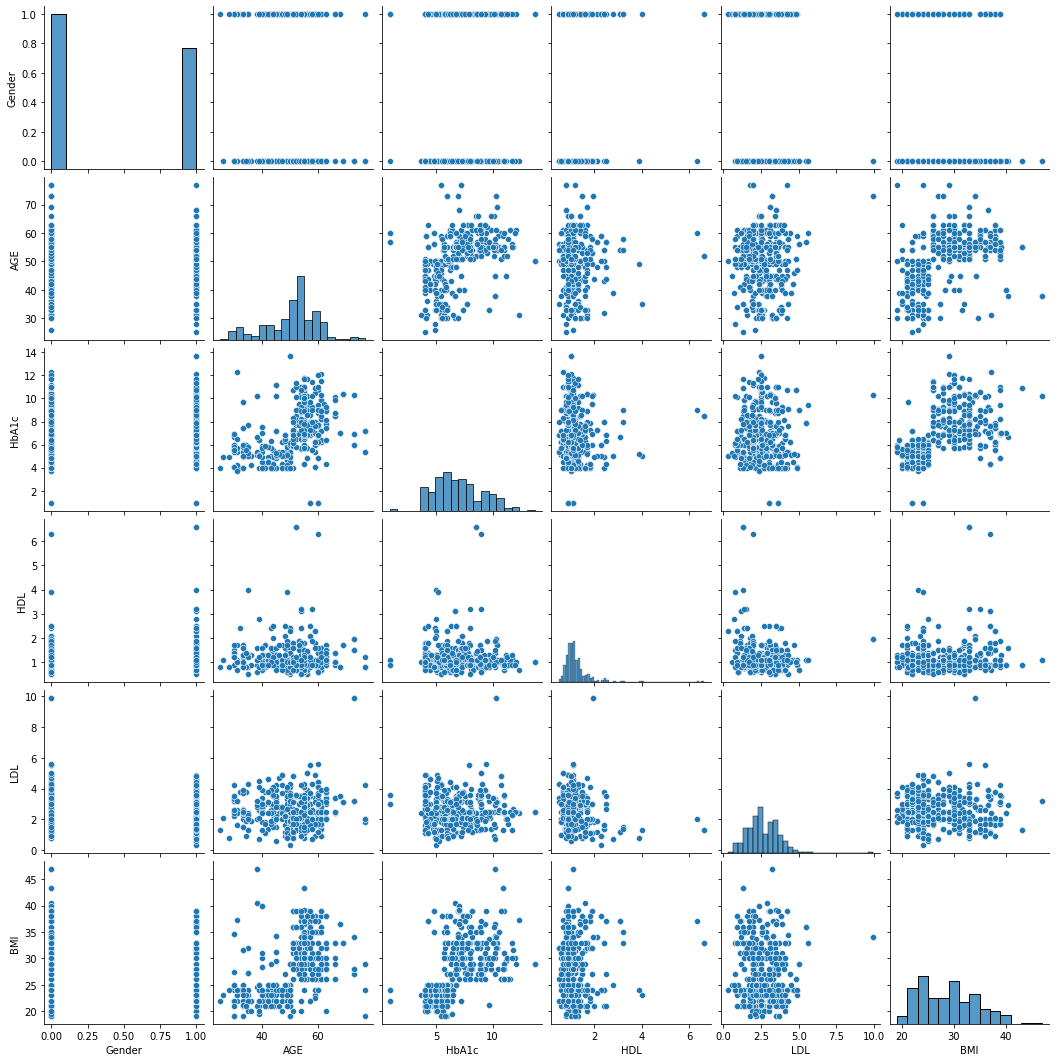

In [ ]:
sns.pairplot(df)
plt.show()